This notebook shall explore the maths behind a very basic machine learning code.  
We're going to use logistic regression as explained by Andrew Ng in the Deep learning track's first course.

In Logistic regression, input X is a matrix with each row representing a single data item and columns representing the features.  
The prediction and loss function are as follows-   

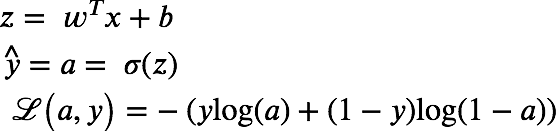



Lets prepare the input first. It should be a `m x n` matrix with `m` rows and `n` columns. `m` data items and `n` features

In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
X_data = pd.read_csv('../input/train.csv')
X_data.head(3)

In [ ]:
# Select only easy to use columns
X_data = X_data[['PassengerId','Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']]
X_data = X_data.dropna()

Y_data = X_data['Survived']
passenger_ids = X_data['PassengerId']

X_data = X_data.drop(['PassengerId', 'Survived'], axis=1)
X_data.head(3)

In [ ]:
gender_map = {'male': 1, 'female':0}
embarked_map = { 'S': -1, 'C': 0, 'Q': 1}

X_data = X_data.replace({"Sex": gender_map, "Embarked": embarked_map})
X_data.head(3)

In [ ]:
X = X_data.values
X

In [ ]:
X.shape

In [ ]:
(rows, cols) = X.shape
Y = Y_data.values
Y = Y.reshape(rows,1)

In [ ]:
Y.shape

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
iterations = 10000
alpha = 0.005
W = np.random.randn(1,cols)
b = np.random.randn(1,1)

for i in range(0,iterations):
#     print("Weights : ", W)
#     print("Bias : ", b)
    A = sigmoid(np.dot(X,W.T)+ b)
    Z = A-Y
    if i%1000 == 999 :print("Iteration :", i, " Total loss :", np.sum(Z**2), "Total wrong : ", np.sum((Y - np.rint(A))**2))
    W -= alpha*(X.T.dot(Z).T)/rows
    b -= alpha*np.sum(Z)/(rows*cols)

In [ ]:
X_test = pd.read_csv('../input/test.csv')
pass_ids_train = X_test[['PassengerId']]
X_test = X_test[['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']]

gender_map = {'male': 1, 'female':0}
embarked_map = { 'S': -1, 'C': 0, 'Q': 1}

X_test = X_test.replace({"Sex": gender_map, "Embarked": embarked_map})
X_test.head(6)

In [ ]:
Y_test = sigmoid(np.dot(X_test,W.T)+ b)
Y_test

In [ ]:
Y_test = np.nan_to_num(np.rint(Y_test))
Y_test

In [ ]:
data_to_submit = pd.DataFrame(np.hstack((np.rint(pass_ids_train), np.rint(Y_test))),
                             columns=['PassengerId', 'Survived'])
data_to_submit.astype(int)

In [ ]:
data_to_submit.astype(int).to_csv('csv_to_submit.csv', index = False)